### Ujjwal Khanna 
### Homework 1 
### Predictive Analytics

## Decision Tree

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [4]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Define column names
columns = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "ConcavePoints_mean", "Symmetry_mean", "FractalDimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se",
    "ConcavePoints_se", "Symmetry_se", "FractalDimension_se", "Radius_worst", "Texture_worst", 
    "Perimeter_worst", "Area_worst", "Smoothness_worst", "Compactness_worst", "Concavity_worst", 
    "ConcavePoints_worst", "Symmetry_worst", "FractalDimension_worst"
]

# Read dataset
cancer_data = pd.read_csv(url, header=None, names=columns)

cancer_data

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,ConcavePoints_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,ConcavePoints_worst,Symmetry_worst,FractalDimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Drop 'ID' column as it's not needed for the model
cancer_data.drop(columns=["ID"], inplace=True)

# Convert 'Diagnosis' column to categorical (M = Malignant, B = Benign)
cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'M': 1, 'B': 0})  # Convert to binary labels
cancer_data

,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,ConcavePoints_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,ConcavePoints_worst,Symmetry_worst,FractalDimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Check class distribution
print("Class Distribution:")
print(cancer_data['Diagnosis'].value_counts(normalize=True))

Class Distribution:
Diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [8]:
# Split dataset into training (70%) and testing (30%) sets
X = cancer_data.drop(columns=["Diagnosis"])  # Features
y = cancer_data["Diagnosis"]  # Target variable

In [9]:
# Set seed for reproducibility
np.random.seed(120)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=120)

In [10]:
# ----------------- Model Training and Hyperparameter Tuning -----------------
# Define parameter grid for GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 10, None],  # Control complexity
    "criterion": ["gini", "entropy"],  # Splitting criteria
}

In [11]:
# Run Grid Search to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=121), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=121),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None]},
             scoring='accuracy')

In [12]:
# Best Model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 6}


In [13]:
# # Train Decision Tree model
# tree = DecisionTreeClassifier(criterion="entropy", random_state=121)
# tree.fit(X_train, y_train)

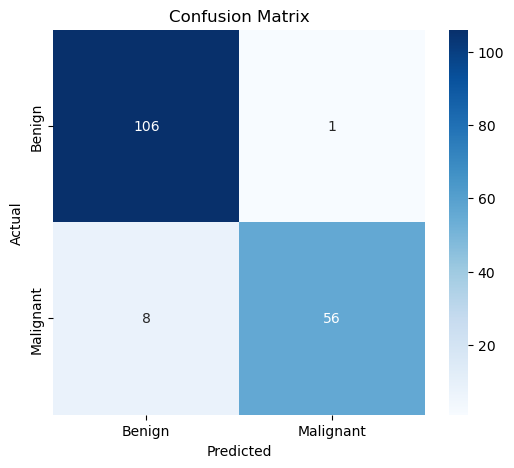


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       107
           1       0.98      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

Test Set Accuracy: 0.9473684210526315


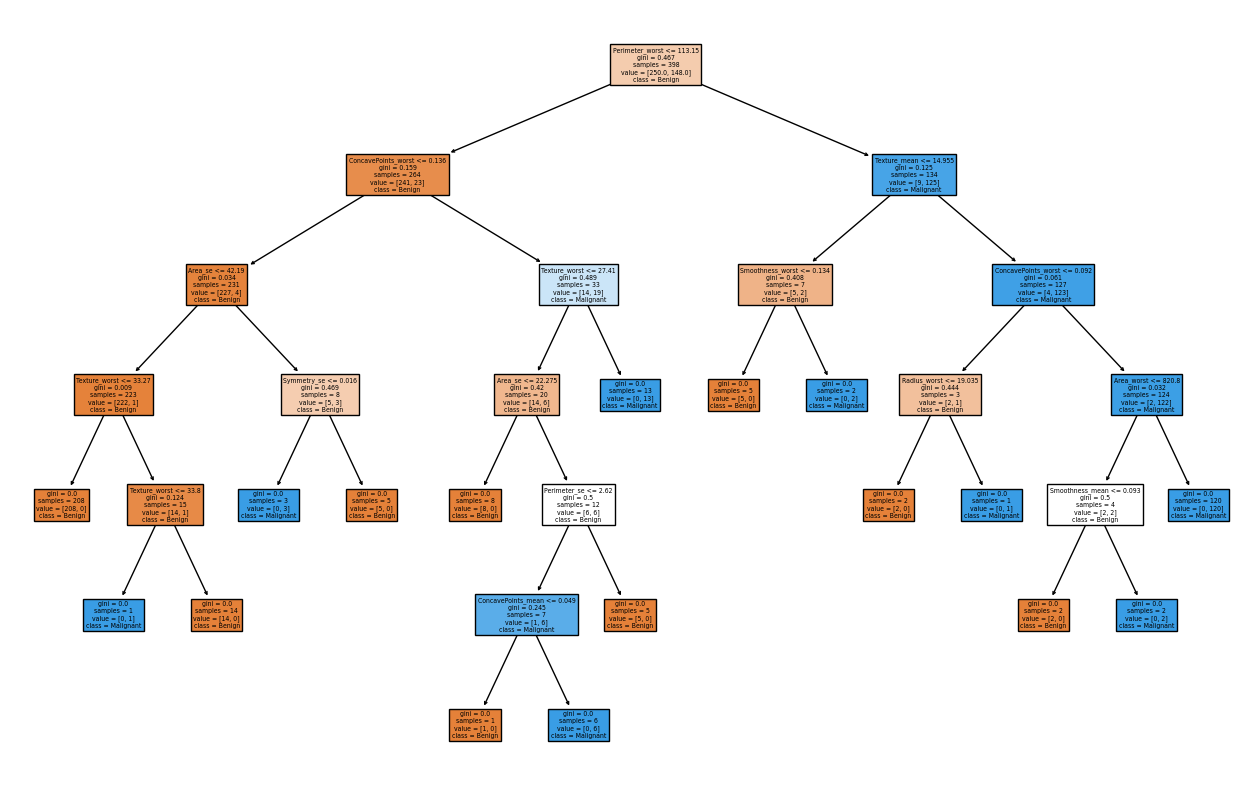

In [14]:
# ----------------- Model Evaluation -----------------
# Predict on Test Set
y_pred = best_tree.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print Accuracy Score
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True)
plt.show()

Overfitting vs Underfitting

When the max_depth is too low (e.g., max_depth=2), the decision tree becomes too simple and fails to capture important patterns in the data. This is known as underfitting, where the model has high bias and performs poorly on both the training and test sets.

On the other hand, when the tree grows too deep (max_depth=None), it starts memorizing noise from the training data instead of learning general patterns. This leads to overfitting, where the model does exceptionally well on the training set but struggles to perform on new, unseen data. A clear sign of overfitting is high training accuracy but low test accuracy.
Why max_depth=6 is a Good Choice?

With your selected best parameters (max_depth=6), the model finds a good balance between learning meaningful patterns and avoiding unnecessary complexity. This depth allows the tree to capture important relationships in the data without overfitting.
How Was the Best Model Selected?

Using GridSearchCV, the model was fine-tuned by testing different hyperparameter values. The best-performing parameters were:

criterion='entropy' – Uses information gain to split nodes, which is effective for classification problems.
max_depth=6 – Keeps the tree from becoming too deep, ensuring it generalizes well to new data.

This optimal model is neither too simple nor too complex, making it a strong choice for accurate predictions.



### Logistic Regression

In [28]:
# Define X (features) and y (target)
X = cancer_data.drop(columns=["Diagnosis"])  # Features
y = cancer_data["Diagnosis"]

# Standardize features (Logistic Regression benefits from feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify=y, random_state=121)

In [32]:
# ----------------- Logistic Regression Model Training -----------------
# Hyperparameter tuning for regularization strength (C)
param_grid = {
    "C": np.logspace(-4, 4, 20),  # Test different regularization values
    "penalty": ["l1", "l2"]  # Compare L1 (Lasso) and L2 (Ridge)
}

grid_search = GridSearchCV(LogisticRegression(solver="liblinear"), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [34]:
# Best parameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train final Logistic Regression model using best hyperparameters
best_model = LogisticRegression(solver="liblinear", C=best_params["C"], penalty=best_params["penalty"])
best_model.fit(X_train, y_train)

Best Parameters: {'C': 0.23357214690901212, 'penalty': 'l2'}


LogisticRegression(C=0.23357214690901212, solver='liblinear')

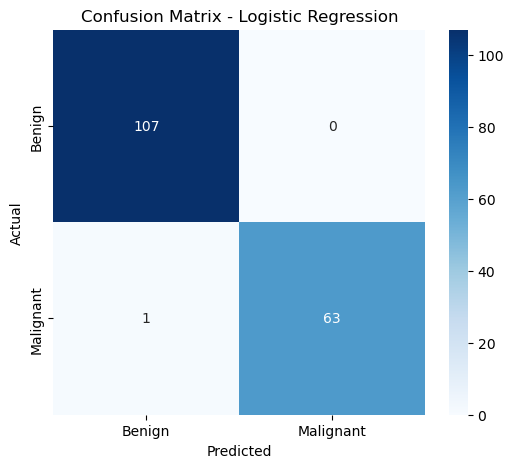


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Test Set Accuracy: 0.9941520467836257


In [35]:
# ----------------- Model Evaluation -----------------
# Predict on Test Set
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print Accuracy Score
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Overfitting vs. Underfitting

Underfitting happens when the regularization strength (C) is set too high, making the model overly simple. This prevents it from capturing important patterns in the data, leading to poor performance on both training and test sets.
Example: If C = 0.0001, the model might be too restricted and fail to learn meaningful insights.

Overfitting occurs when C is too low, allowing the model to memorize details (including noise) from the training data instead of learning general trends. As a result, it performs well on training data but poorly on new, unseen data.
Example: If C = 1000, the model may fit the training data perfectly but struggle with real-world predictions.

Finding the Best Regularization (C)

To strike the right balance between underfitting and overfitting, we use GridSearchCV to find the optimal C value. This ensures the model is complex enough to learn from data but still generalizes well to new inputs.

### K-NN

In [38]:
# Define X (features) and y (target)
X = cancer_data.drop(columns=["Diagnosis"])  # Features
y = cancer_data["Diagnosis"]

# Standardize features (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify=y, random_state=121)

In [40]:
# ----------------- K-Nearest Neighbors (KNN) Model -----------------
# Find the best value for K using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}  # Trying K from 1 to 20
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best K
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K: {best_k}")

# Train KNN with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best K: 3


KNeighborsClassifier(n_neighbors=3)

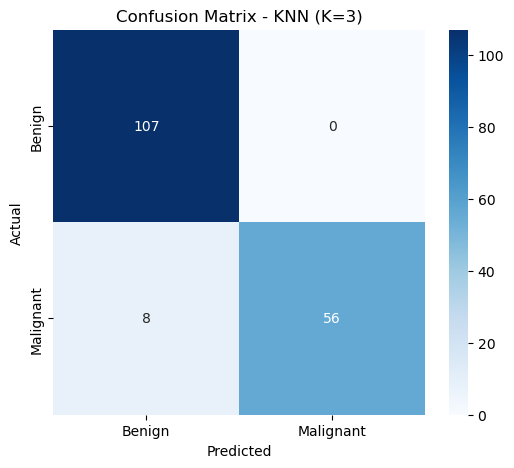


Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       107
           1       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171

Test Set Accuracy: 0.9532163742690059


In [43]:
# ----------------- Model Evaluation -----------------
# Predict on Test Set
y_pred = knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - KNN (K={best_k})")
plt.show()

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print Accuracy Score
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

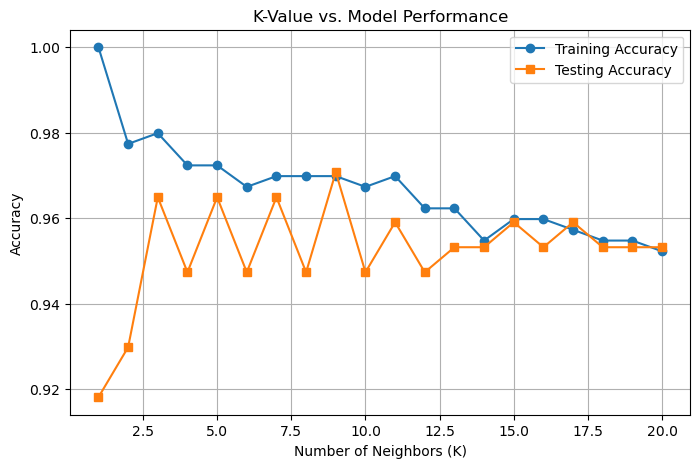

In [42]:
# ----------------- Overfitting vs. Underfitting -----------------
# Visualizing K vs Accuracy to identify underfitting and overfitting
k_values = list(range(1, 21))
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot training and testing accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_values, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K-Value vs. Model Performance')
plt.legend()
plt.grid()
plt.show()

Underfitting happens when K is too small (e.g., K=1). The model becomes too sensitive to noise, memorizing the training data instead of learning general patterns. This leads to overfitting on the training set but poor performance on new data.
Sign: Low test accuracy indicates poor generalization.

Overfitting occurs when K is too high (e.g., K=20). The model becomes overly rigid, averaging too many neighbors and missing important patterns in the data.
Sign: Test accuracy starts dropping after a certain optimal K, as seen in the accuracy plot.

Finding the Best K

To balance bias and variance, we use GridSearchCV to find the optimal K based on test accuracy. The K vs. Accuracy plot helps visualize where the model performs best.
Key Takeaways:

Best K (selected using GridSearchCV) ensures the model is well-balanced.
Feature Scaling (Standardization) is essential for KNN to work effectively.
Overfitting occurs at very small K values, while underfitting happens when K is too large.
Performance Metrics like accuracy, precision, recall, F1-score, and the confusion matrix help evaluate how well the model classifies new data.


### Conclusion

Model Comparison & Conclusion

Logistic Regression outperformed the other models with 99.4% accuracy, demonstrating excellent precision and recall across both classes. 
KNN and Decision Tree performed similarly, with 95.3% and 94.7% accuracy, respectively, but both showed slightly lower recall for class 1 (malignant cases). 
Given its strong balance between precision, recall, and F1-score, Logistic Regression is the best-performing model for this dataset, ensuring high reliability in breast cancer diagnosis.